In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from utils.GraphWrapper import GraphWrapper as GW
import torch

plt.rcParams["font.family"] = "Times New Roman"

In [5]:
STOP = False

## Drastic change with one edge addition

In [6]:
G = nx.Graph()
G.add_edges_from([(0,1),(0,3),(1,2),(1,3),(1,4),(2,4),(2,11),(3,4),(3,5),
                  (4,5),(5,6),(5,7),(6,7),(6,8),(6,9), (7,9),(7,10),(8,9),
                  (9,10),(10,15),(11,12),(13,14),(14,15),(0,11),(8,15),#(12,13)
                  (12,16), (16,17)
                  ])

G2 = nx.Graph()
G2.add_edges_from([(0,1),(0,3),(1,2),(1,3),(1,4),(2,4),(2,11),(3,4),(3,5),
                  (4,5),(5,6),(5,7),(6,7),(6,8),(6,9), (7,9),(7,10),(8,9),
                  (9,10),(10,15),(11,12),(13,14),(14,15),(0,11),(8,15),#(12,13)
                  (12,16), (16,17), (13,17)
                  ])

sensitive_group = np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0])

In [7]:
G2 = nx.Graph()
G2.add_edges_from([(0,1),(1,3),(3,6),(6,0), (0,3),
                  (1,2), (3,4), (4,5), (6,7)
                  ])
G = G2.copy()
G.remove_edge(1,3)

sensitive_group = np.array([0]*G.number_of_nodes())

In [8]:
pos= nx.kamada_kawai_layout(G2)

In [9]:
edge_list = np.array(G.edges())
edge_list = torch.Tensor(np.hstack((edge_list.T, edge_list.T[[1,0],:]))).long()
graph_er = GW(edgelist=edge_list, sensitive_attr=sensitive_group)

edge_list_2 = np.array(G2.edges())
edge_list_2 = torch.Tensor(np.hstack((edge_list_2.T, edge_list_2.T[[1,0],:]))).long()
graph_er_2 = GW(edgelist=edge_list_2, sensitive_attr=sensitive_group)

Loaded Graph with 8 nodes and 8 edges - L computation mode: exact
Loaded Graph with 8 nodes and 9 edges - L computation mode: exact


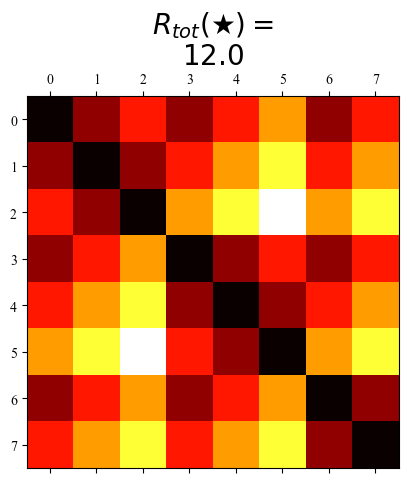

Text(0.5, 1.0, '$R_{tot}(\\bigstar)=$\n$12.0$')

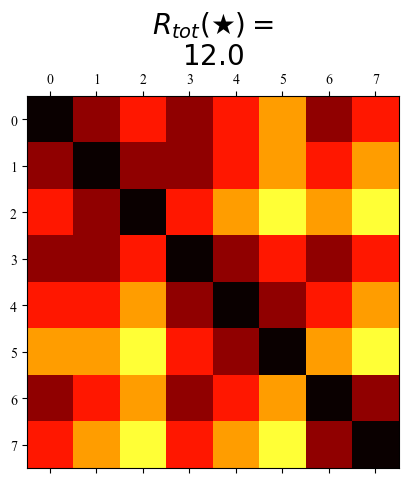

In [10]:
#get the distance from selected noed
ORI_NODE = 0
er = graph_er.get_effective_resistance()
er = nx.floyd_warshall_numpy(G, nodelist = sorted(list(G.nodes)))
distances = er[ORI_NODE,:]


er_2 = graph_er_2.get_effective_resistance()
er_2 = nx.floyd_warshall_numpy(G2, nodelist = sorted(list(G.nodes)))
distances_2 = er_2[ORI_NODE,:]

d_min = distances.min()
d_max = distances.max()


plt.matshow(er, vmax=er.max(), vmin=0, cmap='hot')
plt.title(f'$R_{{tot}}(\\bigstar)=$\n${distances.sum():.1f}$', fontsize=20)

plt.show()

plt.matshow(er_2, vmax=er.max(), vmin=0, cmap='hot')
plt.title(f'$R_{{tot}}(\\bigstar)=$\n${distances_2.sum():.1f}$', fontsize=20)

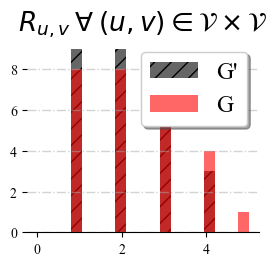

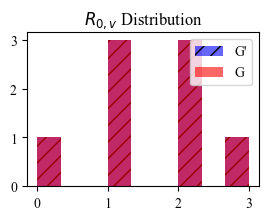

In [11]:

bins = np.linspace(0,er.max(),20)
#get triu indice
plt.figure(figsize=(3,2.5))
plt.hist(er_2[np.triu_indices(G.number_of_nodes(),1)], bins=bins, alpha=.6, label="G'", hatch='//', color='BLACK')
plt.hist(er[np.triu_indices(G.number_of_nodes(),1)], bins=bins, alpha=.6, label='G', color='red')
plt.legend(loc='upper right', fontsize=17, framealpha=1,  bbox_to_anchor=(1., 1), fancybox=True, shadow=True)
plt.title(r"$R_{u,v}\:\forall\: (u,v)\in \mathcal{V}\times\mathcal{V}$", fontsize=19)
#Revome axis lines from top and right
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
#show grid lines horizontal
ax.yaxis.grid(True, alpha=0.5, linestyle='-.', color='darkgrey', zorder=10, linewidth=1)
#show grid lines vertica


plt.show()


bins = np.linspace(0,er[ORI_NODE,:].max(),10)
#get triu indice
plt.figure(figsize=(3,2))
plt.hist(er_2[ORI_NODE,:], bins=bins, alpha=.6, label="G'", hatch='//', color='blue')
plt.hist(er[ORI_NODE,:], bins=bins, alpha=.6, label='G', color='red')
plt.legend(loc='upper right')
plt.title(f"$R_{{{ORI_NODE},v}}$ Distribution")
plt.show()


C:\Users\adria\AppData\Local\Temp\ipykernel_4256\799730735.py:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, shrink=.8, aspect=10)


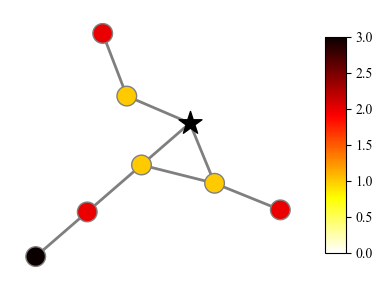

In [12]:
f, ax = plt.subplots(1, 1, figsize=(4, 3))
node_options = {
        "node_size": [200]*G.number_of_nodes(),
        "node_color": distances,
        "cmap": plt.cm.hot_r,
        'pos':pos,
        "alpha": 1,
        "edgecolors": "grey",
        "linewidths": 1,
    }
edge_options = {
        "width": 2,
        "edge_cmap": plt.cm.seismic,
        "edge_color": 'black',
        'pos':pos,
        "alpha": .5,
    }
label_options = {
        'pos':pos,
        'font_color':'w',
        'font_size':10,
        'font_weight':'bold',
        'alpha':1
}

ordered_nodes_wh_ori = np.arange(G.number_of_nodes())
node_options['node_size'][ORI_NODE] = 0

nx.draw_networkx_nodes(G, nodelist = ordered_nodes_wh_ori, **node_options, ax=ax,
                       vmin = d_min, vmax = d_max,)
nx.draw_networkx_nodes(G, nodelist = [ORI_NODE], pos=pos, node_color='black', ax=ax, node_shape='*')
nx.draw_networkx_edges(G, **edge_options, ax=ax)
#nx.draw_networkx_labels(G, **label_options, ax=ax)

sm = plt.cm.ScalarMappable(cmap=node_options['cmap'], 
                           norm=plt.Normalize(vmin=d_min, vmax=d_max))
plt.axis('off')
cbar = plt.colorbar(sm, shrink=.8, aspect=10)
#ticklabs = cbar.ax.get_yticklabels()
#cbar.ax.set_yticklabels(ticklabs, fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\adria\AppData\Local\Temp\ipykernel_4256\3384721789.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, shrink=.8, aspect=10)


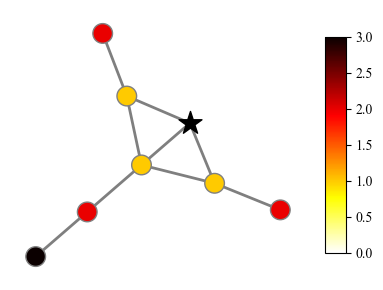

In [13]:
f, ax = plt.subplots(1, 1, figsize=(4, 3))
node_options["node_color"]= distances_2

nx.draw_networkx_nodes(G2, nodelist = ordered_nodes_wh_ori, **node_options, ax=ax,
                       vmin = d_min, vmax = d_max,)
nx.draw_networkx_nodes(G2, nodelist = [ORI_NODE], pos=pos, node_color='black', ax=ax, node_shape='*')
nx.draw_networkx_edges(G2, **edge_options, ax=ax)

sm = plt.cm.ScalarMappable(cmap=node_options['cmap'], 
                           norm=plt.Normalize(vmin=d_min, vmax=d_max))
plt.axis('off')

cbar = plt.colorbar(sm, shrink=.8, aspect=10)
#ticklabs = cbar.ax.get_yticklabels()
#cbar.ax.set_yticklabels(ticklabs, fontsize=12)

plt.tight_layout()
plt.show()


In [14]:
assert STOP == False

## Diff Algorithms rewiring viz

In [36]:
from utils.sdrf import sdrf

In [ ]:
sdrf(copy.deepcopy(GW), loops=2, remove_edges=False, removal_bound=2, is_undirected=True, tau=TAU)

In [35]:
edgelist = np.vstack(nx.adjacency_matrix(G).nonzero())

tuple

## Metrics Visualizations

In [191]:
def show_metric(metric, title, nodelist):
    n_mets = len(metric)
    fig, ax = plt.subplots(1, n_mets, figsize=(4*n_mets, 4))
    ax = [ax] if n_mets == 1 else ax
    for i in range(n_mets):
        node_options['node_color'] = metric[i]
        nx.draw_networkx_nodes(G, **node_options, ax=ax[i], nodelist=nodelist)
        nx.draw_networkx_edges(G, **edge_options, ax=ax[i])
        nx.draw_networkx_labels(G, **label_options, ax=ax[i])

        sm = plt.cm.ScalarMappable(cmap=node_options['cmap'],
                                    norm=plt.Normalize(vmin=node_options['node_color'].min(), vmax=node_options['node_color'].max()))
        plt.colorbar(sm, ax=ax[i], shrink=.8, aspect=10)
        ax[i].axis('off')
        ax[i].set_title(title[i], fontsize=18)

    plt.tight_layout()
    plt.show()

In [230]:
#G = nx.balanced_tree(3, 3)

#G = nx.barbell_graph(5,4)

#G = nx.dorogovtsev_goltsev_mendes_graph(2)

#G = nx.ladder_graph(4)

G = nx. lollipop_graph(4, 5)   #<-------------

#G = nx.path_graph(10)

#G  = nx.tadpole_graph(5,3)

#get Stochastic block model graph
G = nx.stochastic_block_model([10, 25], [[.5, .05], [.05, .5]], seed=0, directed=False)


G = nx.stochastic_block_model([20, 10, 6], [[.7, .03, 0],
                                             [.03, .7, .06],
                                             [0, .06, .7]], seed=1, directed=False)

S = np.ones(G.number_of_nodes())
S = np.ones(G.number_of_nodes())
S[:20] = 0
S[20:30] = 1
S[30:] = 2

G2 = nx.Graph()
G2.add_edges_from([(0,1),(1,3),(3,6),(6,0), (0,3),
                  (1,2), (3,4), (4,5), (6,7),])
G = G2.copy()
G.remove_edge(1,3)

G = nx.Graph()
G.add_edges_from([(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4),
                  (5,6),(5,7),(5,8),(5,9),(6,7),(6,8),(6,9),(7,8),(7,9),(8,9),
                  (10,0),(10,9),(0,9)])

In [231]:
pos = nx.kamada_kawai_layout(G)

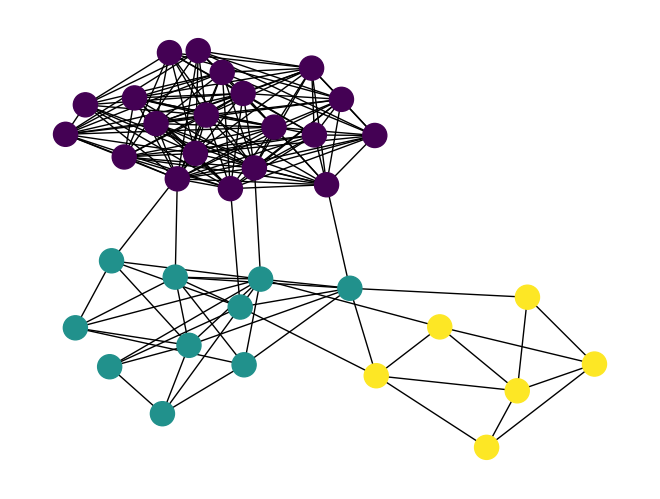

In [232]:
nx.draw(G, pos=pos, node_color=S)

In [233]:
edge_list = np.array(G.edges())
edge_list = torch.Tensor(np.hstack((edge_list.T, edge_list.T[[1,0],:]))).long()
graph_er = GW(edgelist=edge_list)
R = graph_er.get_effective_resistance()

Loaded Graph with 36 nodes and 178 edges - L computation mode: exact


In [234]:
node_tot = R.sum(axis=1)
node_diam = R.max(axis=1)[0]
node_betw  = (R*graph_er.laplacian.bool()).sum(1)

In [235]:
0.5*R.sum(), node_tot.sum()/2

(tensor(284.5273), tensor(284.5273))

In [236]:
node_tot[S==0].mean(), node_tot[S==1].mean(), node_tot[S==2].mean()

(tensor(12.3568), tensor(16.6123), tensor(25.9660))

In [237]:
node_diam[S==0].mean(), node_diam[S==1].mean(), node_diam[S==2].mean()

(tensor(0.9712), tensor(0.8674), tensor(0.8510))

In [238]:
node_betw[S==0].mean(), node_betw[S==1].mean(), node_betw[S==2].mean()

(tensor(1.9652), tensor(2.0056), tensor(1.7733))

In [239]:
node_options = {
        "node_size": [300]*G.number_of_nodes(),
        "node_color": 'blue',
        "cmap": plt.cm.hot_r,
        'pos':pos,
        "alpha": 1,
        "edgecolors": "grey",
        "linewidths": 1,
    }
edge_options = {
        "width": 2,
        "edge_cmap": plt.cm.seismic,
        "edge_color": 'black',
        'pos':pos,
        "alpha": .5,
    }
label_options = {
        'pos':pos,
        'font_color':'blue',
        'font_size':10,
        'font_weight':'bold',
        'alpha':0
}

In [240]:
node_list = np.arange(G.number_of_nodes())

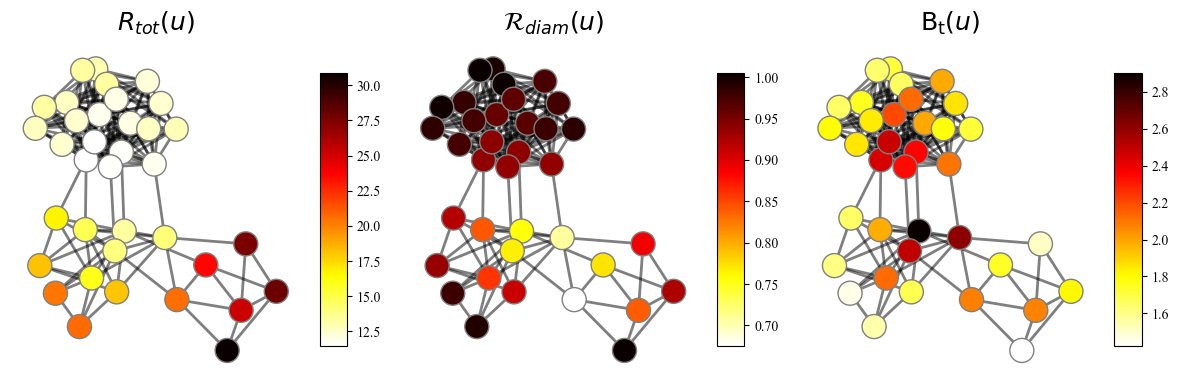

In [241]:
show_metric([node_tot, node_diam, node_betw],
            ['$R_{tot}(u)$', '$\mathcal{R}_{diam}(u)$', '$\mathsf{B_t}(u)$'],
            node_list)

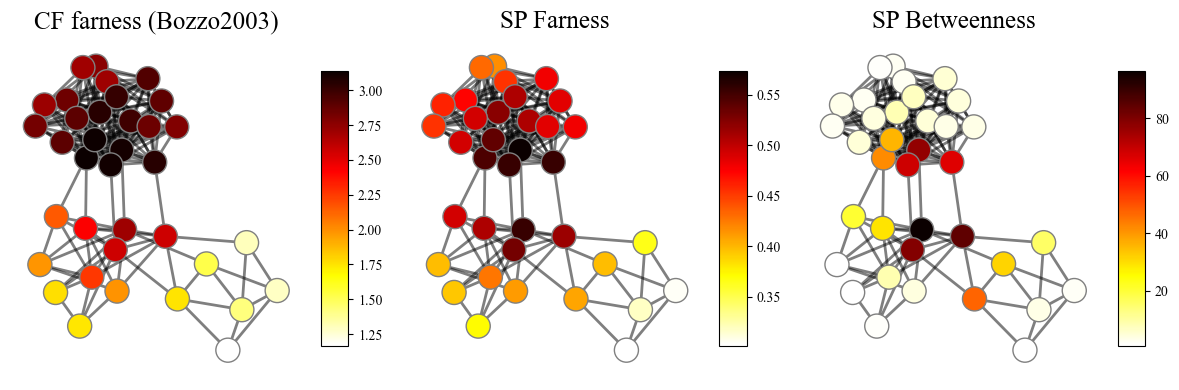

In [242]:
currenflow_cent = G.number_of_nodes()/node_tot
bets = nx.betweenness_centrality(G, normalized=False)
shortest_p_betw = np.array([bets[ix] for ix in node_list])

farness= nx.closeness_centrality(G)
farness = np.array([farness[ix] for ix in node_list])

show_metric([currenflow_cent, farness, shortest_p_betw], ['CF farness (Bozzo2003)', 'SP Farness', 'SP Betweenness'], node_list)

$R_{tot}(u) = nG^+_{i,i}+ Tr(G^+) -2$ (Bozzo, 2003)

In [217]:
n = G.number_of_nodes()
n*graph_er.pinv.diag() + graph_er.pinv.trace() -2 

tensor([15.1359, 13.7816, 15.4515, 13.5083, 14.3264, 15.0042, 13.9475, 14.5026,
        13.4598, 13.3540, 14.0740, 15.5001, 13.4073, 14.7559, 14.4712, 15.4289,
        14.4695, 14.8156, 13.7290, 14.7153, 16.0612, 15.7140, 17.8036, 19.4100,
        14.9047, 19.6423, 15.0792, 18.1328, 22.0725, 16.1089, 26.6011, 21.4078,
        25.3726, 19.9492, 20.2312, 22.1652, 22.8875, 22.3795, 25.3756, 17.4178])

In [218]:
node_tot

tensor([15.1359, 13.7816, 15.4515, 13.5083, 14.3264, 15.0042, 13.9475, 14.5026,
        13.4598, 13.3540, 14.0740, 15.5001, 13.4073, 14.7559, 14.4712, 15.4289,
        14.4695, 14.8156, 13.7290, 14.7153, 16.0612, 15.7140, 17.8036, 19.4100,
        14.9047, 19.6423, 15.0792, 18.1328, 22.0725, 16.1089, 26.6011, 21.4078,
        25.3726, 19.9492, 20.2312, 22.1652, 22.8875, 22.3795, 25.3756, 17.4178])

## Current-flow betweenness (Bozzo, 2013)

$$b_i = \sum_{s<t} F_i^{s,t} =  \sum_{s<t} \left(\frac{1}{4} \sum_j\left(A_{i,j} \left|R_{i,s}-R_{j,s} +R_{j,t}-R_{i,t} \right|\right)\right)$$

In [219]:
#working implementations of CF BTW
import numpy as np
import torch

def calculate_b(A, R):
    """
    Calculates the Current flow Betwenness for each node in a graph based on the given adjacency matrix A and effective resistance R.

    Parameters:
    A (numpy.ndarray): Adjacency matrix representing the graph.
    R (numpy.ndarray): Ranking matrix representing the rankings of nodes in the graph.

    Returns:
    numpy.ndarray: Array of b values for each node in the graph.
    """
    n = A.shape[0]
    b = np.zeros(n)
    
    for i in range(n):
        for s in range(n):
            for t in range(s+1, n):
                sum_j = 0
                for j in range(n):
                    sum_j += A[i, j] * abs(R[i, s] - R[j, s] + R[j, t] - R[i, t])
                
                b[i] += 0.25 * sum_j
    
    return b


def calculate_b2(A, R):
    """
    Calculates the Current Flow Betweenness for each node in a graph based on the given adjacency matrix A and effective resistance R.

    Parameters:
    A (torch.Tensor): Adjacency matrix representing the graph.
    R (torch.Tensor): Ranking matrix representing the rankings of nodes in the graph.

    Returns:
    torch.Tensor: Array of b values for each node in the graph.
    """
    n = A.shape[0]
    b = torch.zeros(n)
    
    for i in range(n):
        for s in range(n):
            for t in range(s + 1, n):
                sum_j = torch.sum(A[i] * torch.abs(R[i, s] - R[:, s] + R[:, t] - R[i, t]))
                b[i] += 0.25 * sum_j
    
    return b

In [220]:
A = (graph_er.laplacian - torch.eye(graph_er.laplacian.shape[0])*torch.diag(graph_er.laplacian)).abs()
R = graph_er.get_effective_resistance()

CF_bet = calculate_b(A, R)

In [221]:
CF_bet2 = calculate_b2(A, R)

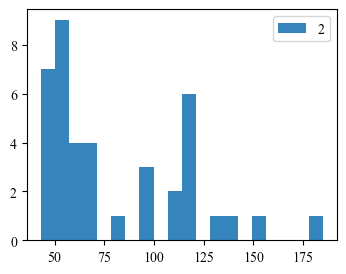

In [222]:
plt.figure(figsize=(4,3))
plt.hist(CF_bet2, bins=20, alpha=.9, label='2')
#plt.hist(CF_bet, bins=20, alpha=.0, hatch='///+++', label='1')
plt.legend()
plt.show()

In [229]:
CF_bet2[S==0].mean(), CF_bet2[S==1].mean(), CF_bet2[S==2].mean()

(tensor(69.7544), tensor(103.6532), tensor(78.7806))

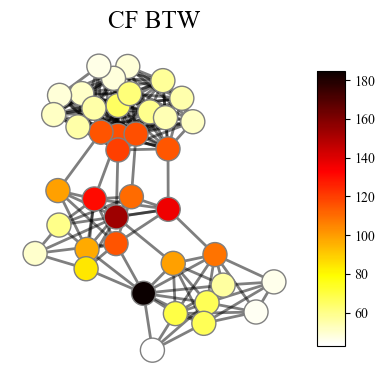

In [223]:
show_metric([CF_bet2], ['CF BTW'], node_list)

In [220]:
show_metric([CF_bet, CF_bet2, CF_bet3], ['CF BTW1', 'CF BTW2','CF BTW3'], node_list)

NameError: name 'CF_bet3' is not defined

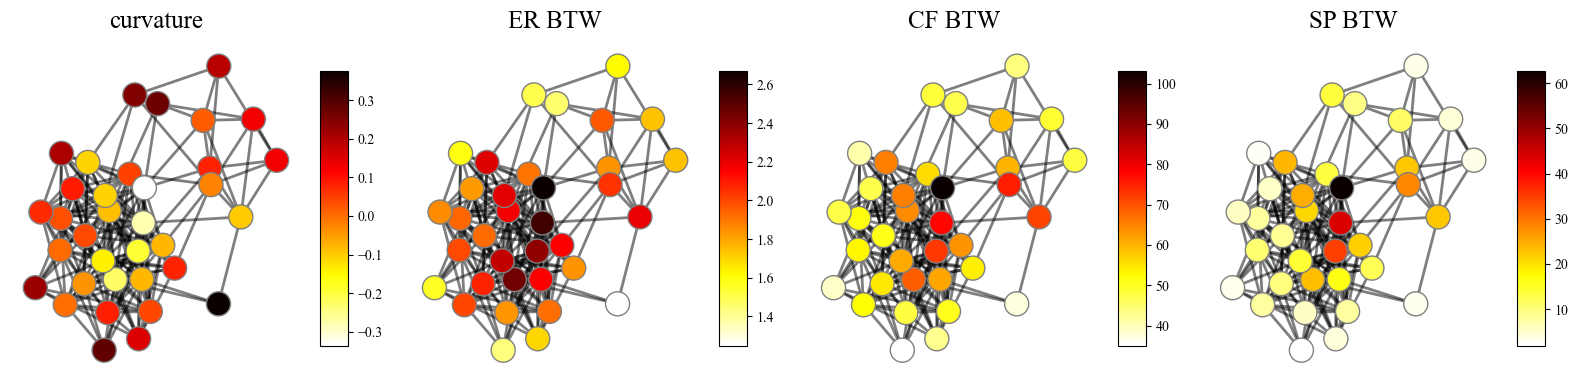

In [221]:
show_metric([1-0.5*node_betw, node_betw, CF_bet2, shortest_p_betw], ['curvature','ER BTW', 'CF BTW','SP BTW'], node_list)